# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
# Import require librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set ' forestfires.csv'
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Labeling rows has been droped for reducing the dimensions for time being. we will do the label encoding later

In [3]:
df.drop(df.columns[11:30],axis = 1,inplace = True)

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [6]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [7]:
df.duplicated().sum()

8

In [8]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [11]:
df.shape

(509, 12)

# From the above we have dropped duplicates and no null values are there in the data frame

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 51.7+ KB


# Visualization of the data 

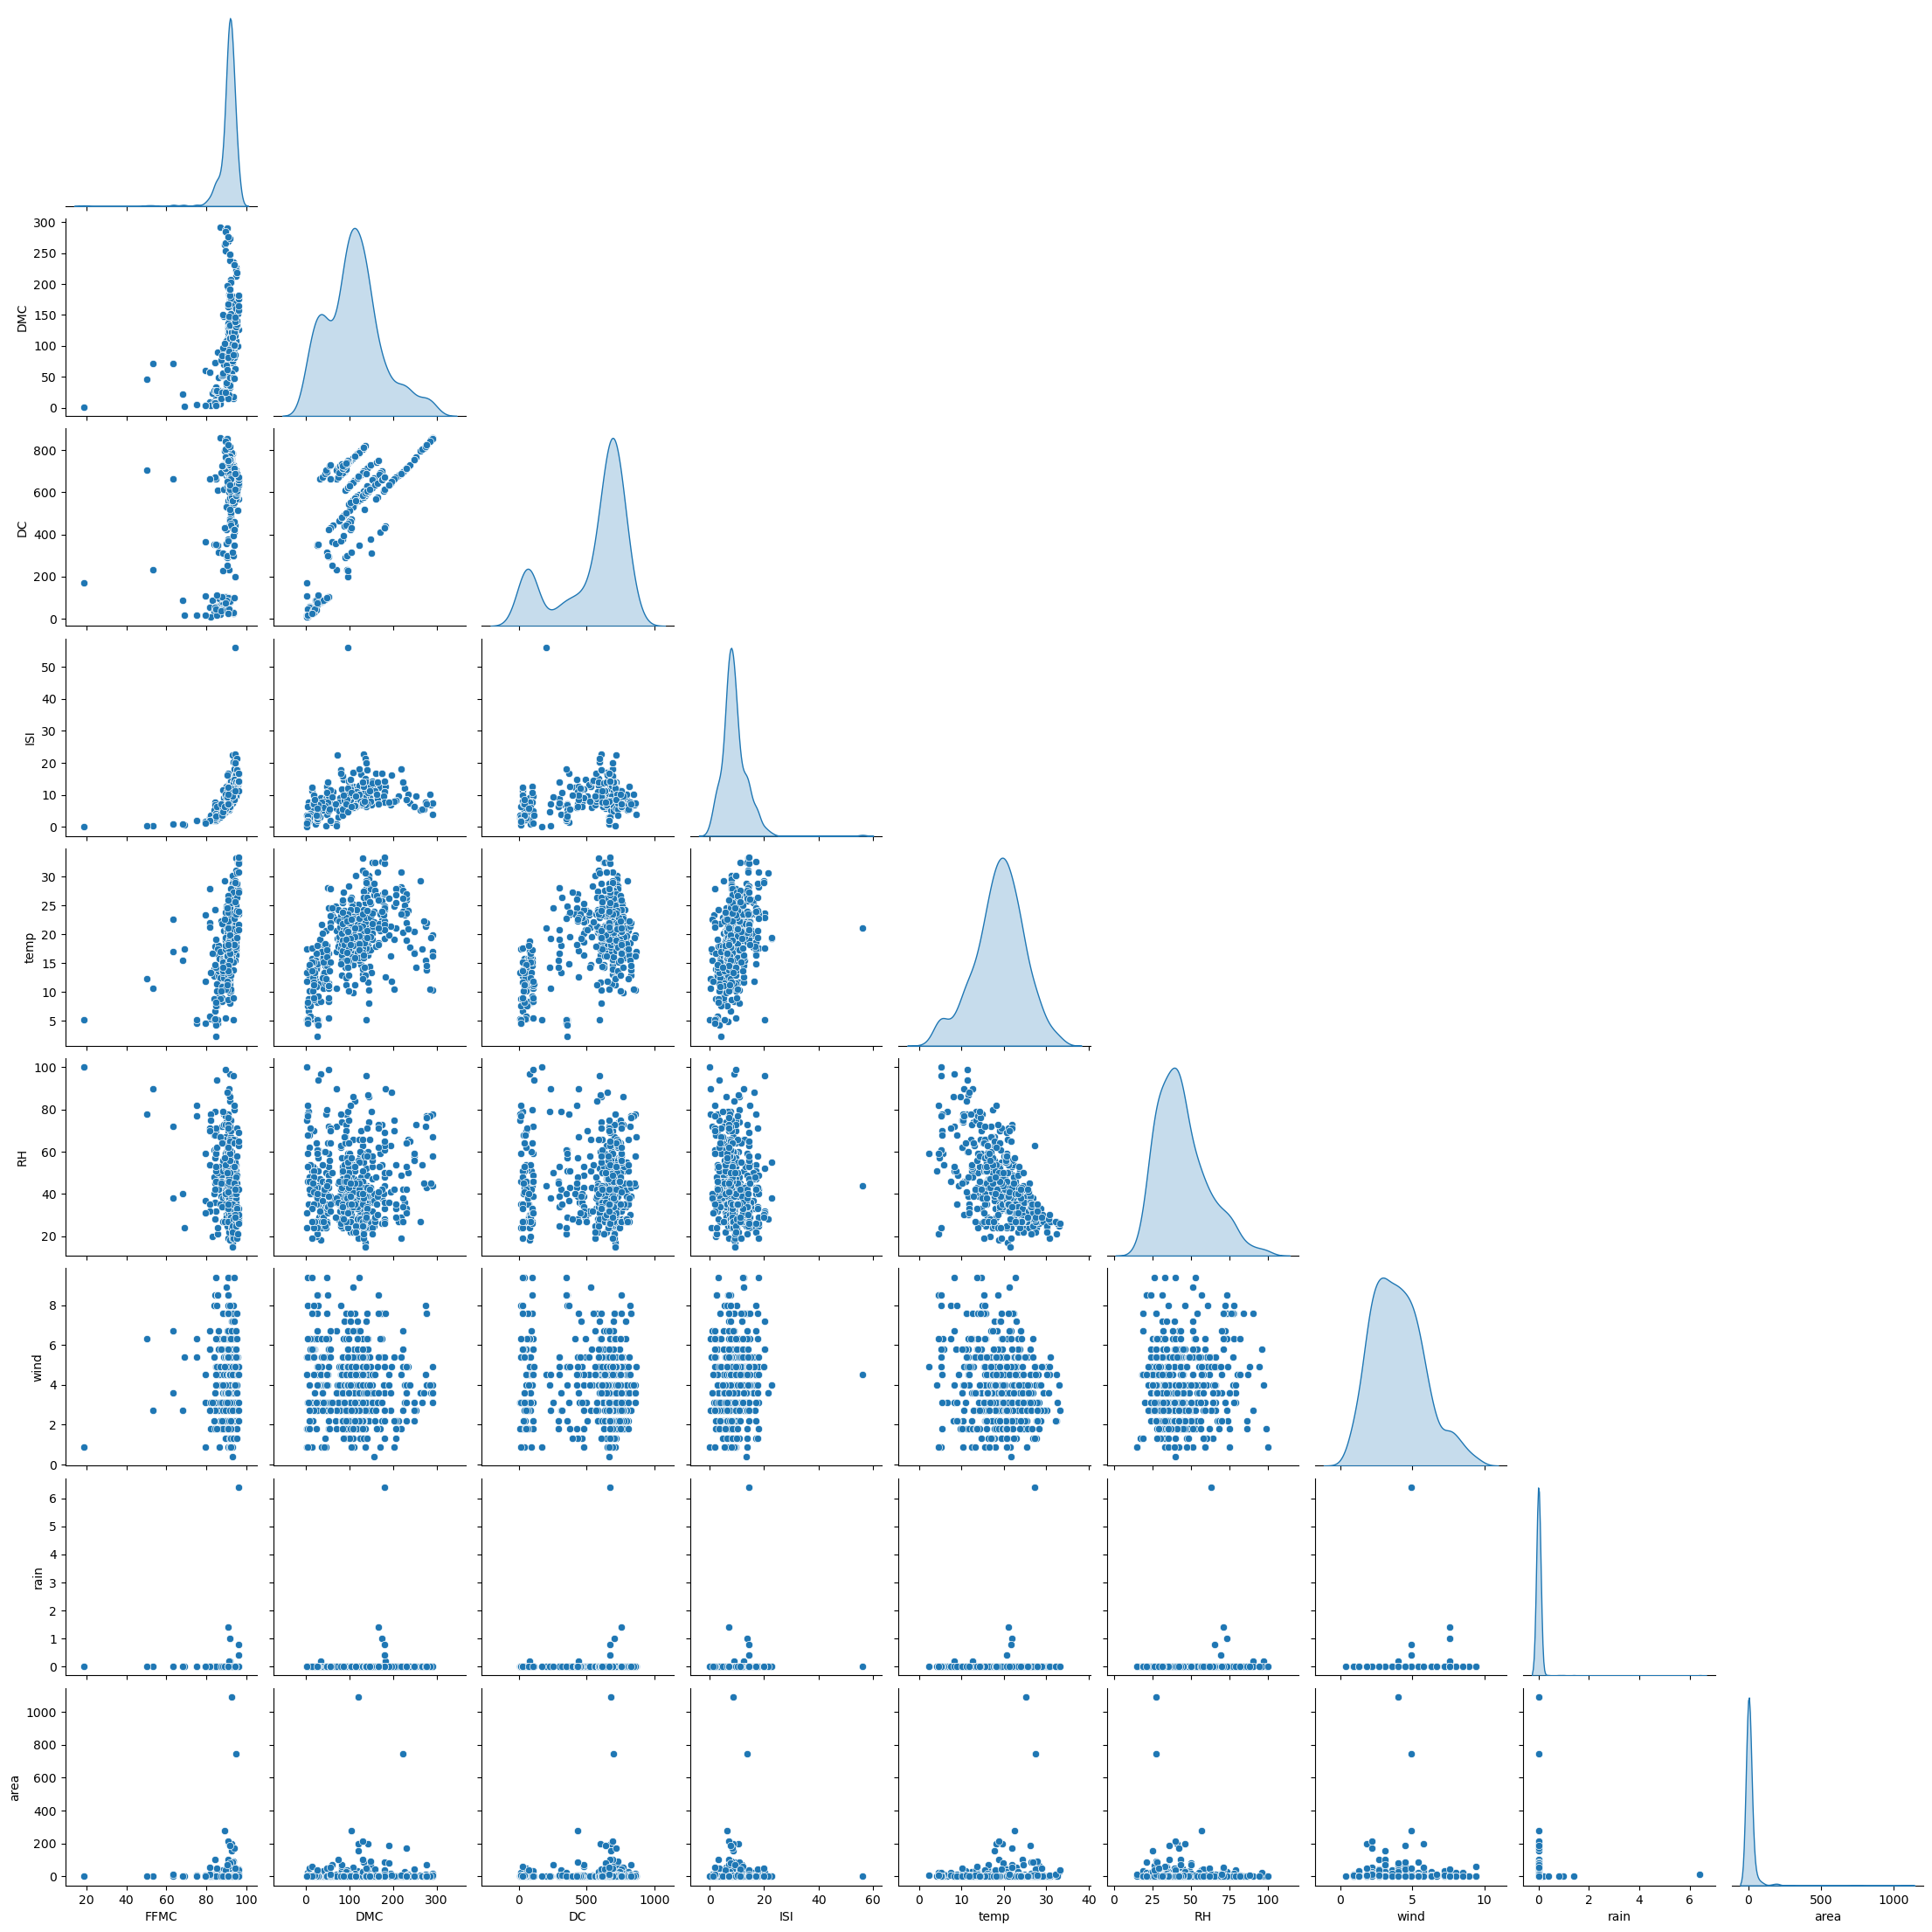

In [13]:
# Visualizing numeric features
numeric_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Pairplot for numeric features
sns.pairplot(df[numeric_features],diag_kind = 'kde', corner = True)
plt.show();

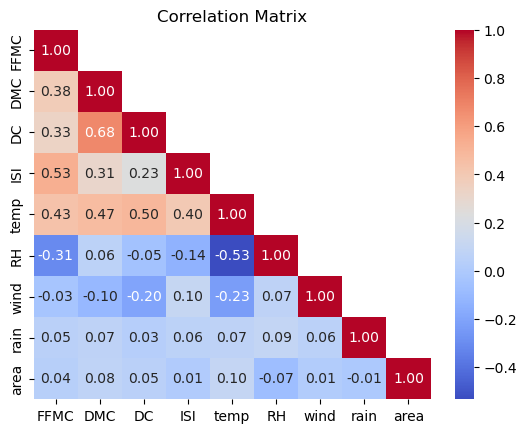

In [14]:
# Heatmap for correlation matrix
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask = np.triu(correlation_matrix,1))
plt.title('Correlation Matrix')
plt.show();

# There is no strong positive or negative correlaion between the features

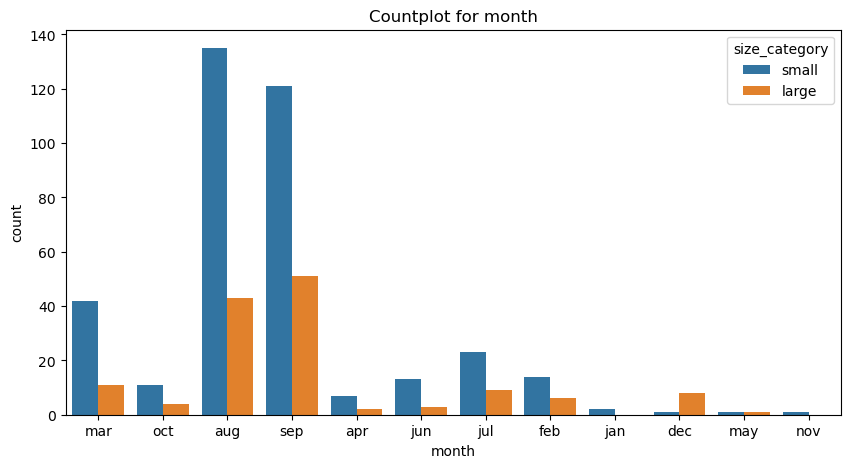

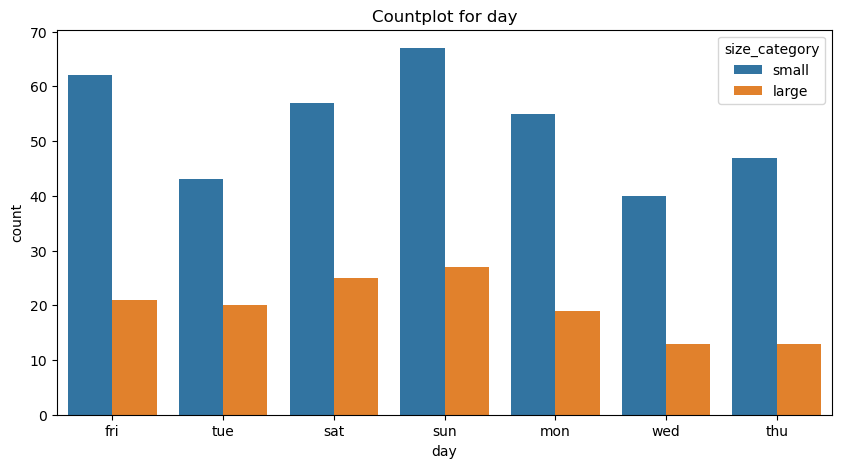

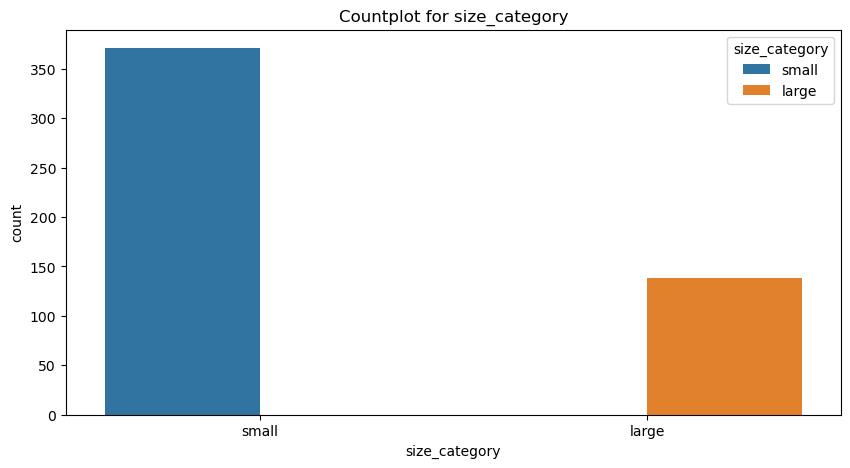

In [15]:
# Visualizing categorical features
categorical_features = ['month', 'day', 'size_category']

# Countplot for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df, hue='size_category')
    plt.title(f'Countplot for {feature}')
    plt.show()

# From the above plots , we can say that the fire happening is more in the month of august and september and in the weeknds i.e on saturdays and sundays also the fire happing is more

# Bi variate analysis between the categorical features with respect to are of the fire

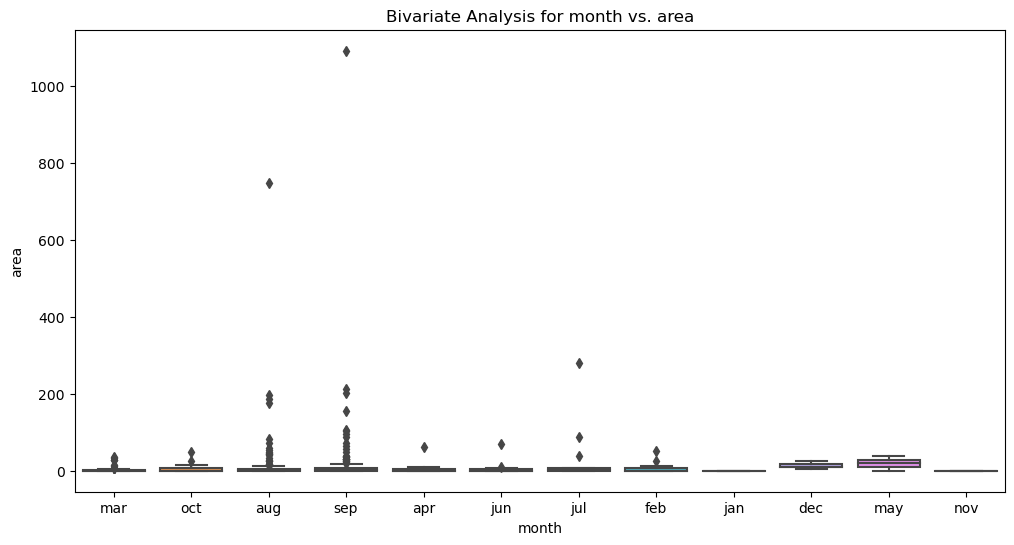

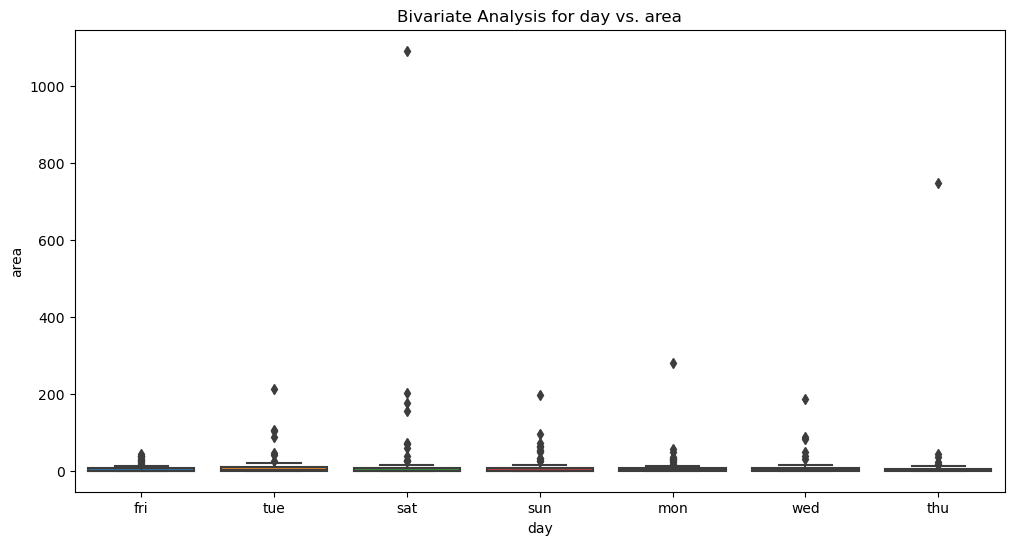

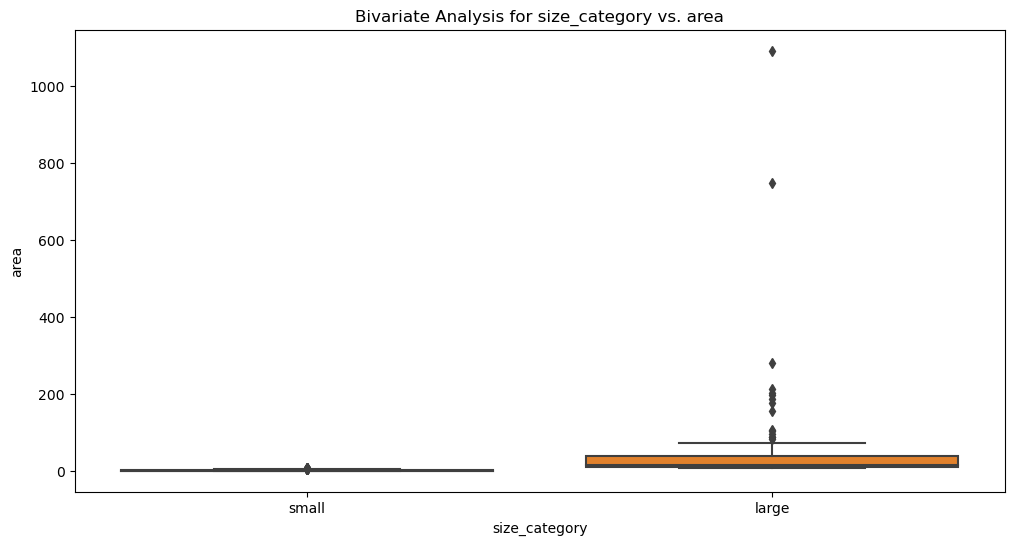

In [16]:
# Bivariate analysis for categorical features with respect to the target variable ('area')
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='area', data=df)
    plt.title(f'Bivariate Analysis for {feature} vs. area')
    plt.show()

In [17]:
# Pie chart for 'size_category'
size_category_counts = df['size_category'].value_counts()
labels = size_category_counts.index
sizes = size_category_counts.values

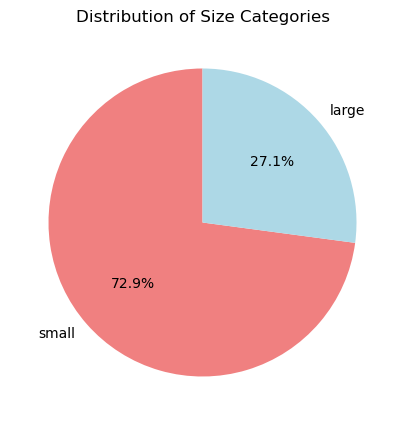

In [18]:
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Size Categories')
plt.show()

# From the above pie chart, The fire covered in the small area is more when compared to large area.Means the fire covered accounted for small area is more when compared to large area

# STATISTICAL SUMMARY OF THE DATA

In [19]:
df.describe().round(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.00,509.00,509.00,509.00,509.00,509.00,509.00,509.00,509.00
mean,90.62,110.24,547.79,9.02,18.87,44.25,4.01,0.02,12.99
std,5.56,63.80,248.20,4.59,5.84,16.37,1.80,0.30,64.13
min,18.70,1.10,7.90,0.00,2.20,15.00,0.40,0.00,0.00
25%,90.20,62.30,437.70,6.40,15.40,32.00,2.70,0.00,0.00
50%,91.60,108.30,664.20,8.40,19.30,42.00,4.00,0.00,0.61
75%,92.90,141.30,713.90,11.00,22.80,53.00,4.90,0.00,6.58
max,96.20,291.30,860.60,56.10,33.30,100.00,9.40,6.40,1090.84


In [59]:
# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers
from keras.layers import Dropout
from tensorflow import keras
from sklearn.model_selection import GridSearchCV

In [21]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['month', 'day'], drop_first=True)

In [23]:
# Separate continuous and categorical features
continuous_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_features = [col for col in df.columns if col not in continuous_features]

In [24]:
# Scale only the continuous features
scaler_continuous = StandardScaler()
df[continuous_features] = scaler_continuous.fit_transform(df[continuous_features])

In [25]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,0.00,small,...,0,0,0,0,0,0,0,0,0,0
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,0.00,small,...,0,0,1,0,0,0,0,0,1,0
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,0.00,small,...,0,0,1,0,0,1,0,0,0,0
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,0.00,small,...,0,0,0,0,0,0,0,0,0,0
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,0.00,small,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,6.44,large,...,0,0,0,0,0,0,1,0,0,0
513,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,54.29,large,...,0,0,0,0,0,0,1,0,0,0
514,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,11.16,large,...,0,0,0,0,0,0,1,0,0,0
515,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,0.00,small,...,0,0,0,0,0,1,0,0,0,0


In [26]:
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

In [27]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,0.0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,0.0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [93]:
x = df.drop('size_category',axis = 1)
y = df[['size_category']]

In [94]:
x.shape

(509, 26)

In [95]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Hyperparameter Tuning for Optimal Learning rate ,Number of Layers and Neurons

In [30]:

def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [280]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   ---------------------------- ----------- 92.2/128.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 128.9/128.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project')

In [36]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [37]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 57s]
val_accuracy: 0.9912854035695394

Best val_accuracy So Far: 0.9934640526771545
Total elapsed time: 00h 11m 27s


In [38]:
tuner.results_summary()

Results summary
Results in project\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 96
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 64
units_7: 64
units_8: 32
units_9: 32
units_10: 96
units_11: 96
units_12: 64
units_13: 64
units_14: 32
units_15: 32
units_16: 32
units_17: 64
units_18: 96
Score: 0.9934640526771545

Trial 0 summary
Hyperparameters:
num_layers: 10
units_0: 32
units_1: 64
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
Score: 0.9912854035695394

Trial 4 summary
Hyperparameters:
num_layers: 6
units_0: 96
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 96
units_5: 96
units_6: 96
units_7: 96
units_8: 64
units_9: 64
units_10: 96
units_11: 64
units_12: 96
units_13: 96
units_14: 32
units_15: 64
units_16: 64
units_17: 96
units_18: 32
Score: 0.991285403569

# Hyperparameter Tuning for Optimal Batch_size, Number of Epochs

In [47]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=26,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [48]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=5,verbose=10)

In [49]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   5.1s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   4.1s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   4.0s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   4.1s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   4.0s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 3/5; 9/16] END ....batch_size=40, epochs=10;, score=0.935 total time=   3.7s
[CV 4/5; 9/16] START batch_size=40, epochs=10...................................
[CV 4/5; 9/16] END ....batch_size=40, epochs=10;, score=0.967 total time=   3.6s
[CV 5/5; 9/16] START batch_size=40, epochs=10...................................
[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=1.000 total time=  14.7s
[CV 1/5; 10/16] START batch_size=40, epochs=50..................................
[CV 1/5; 10/16] END ...batch_size=40, epochs=50;, score=1.000 total time=   5.2s
[CV 2/5; 10/16] START batch_size=40, epochs=50..................................
[CV 2/5; 10/16] END ...batch_size=40, epochs=50;, score=1.000 total time=   4.9s
[CV 3/5; 10/16] START batch_size=40, epochs=50..................................
[CV 3/5; 10/16] END ...batch_size=40, epochs=50;, score=1.000 total time=   4.8s
[CV 4/5; 10/16] START batch_size=40, epochs=50..................................
[CV 4/5; 10/16] END ...batch

In [50]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best 1.0, using {'batch_size': 20, 'epochs': 200}


# Hyperparameter Tuning for Optimal Droupout rate

In [51]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=26,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [53]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=5,verbose=10)

In [54]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=1.000 total time=  14.0s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=1.000 total time=  12.1s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=  12.8s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=0.967 total time=  12.0s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=1.000 total time=  11.6s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END .............dropout_rate=0.1;,

In [55]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))

Best 0.9870967626571655, using {'dropout_rate': 0.3}


# Hyperparameter Tuning for Optimal Activation Function and Kernel Initializer

In [75]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=26,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3

In [76]:
model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=5,verbose=10)

In [62]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=  13.1s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=1.000 total time=  11.3s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.935 total time=  11.4s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=1.000 total time=  11.4s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=1.000 total time=  11.4s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform..............

In [63]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))

Best 0.9868817090988159, using {'activation_function': 'softmax', 'init': 'zero'}


#

# Best parameters : batch_size = 20,epochs = 200,learning rate = 0.0001,number of layers = 9, dropout rate = 0.3,activaion function = softmax,kernel initializer = zero

In [ ]:
# The epochs 200 is more, we will go with epochs =100 

In [82]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.3))        
# Defining the Second layer of the model
model.add(Dense(units=6,activation='relu'))
 model.add(Dropout(0.3))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 20, epochs = 100)

Epoch 1/100
12/12 [==============================] - 6s 88ms/step - loss: 1.3289 - accuracy: 0.7227 - val_loss: 1.5009 - val_accuracy: 0.7119
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 0.8828 - accuracy: 0.7563 - val_loss: 0.9147 - val_accuracy: 0.7034
Epoch 3/100
12/12 [==============================] - 0s 20ms/step - loss: 0.8349 - accuracy: 0.7479 - val_loss: 0.5259 - val_accuracy: 0.8390
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 0.6785 - accuracy: 0.8361 - val_loss: 0.4580 - val_accuracy: 0.8983
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 0.5071 - accuracy: 0.8529 - val_loss: 0.4082 - val_accuracy: 0.9153
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 0.4409 - accuracy: 0.8908 - val_loss: 0.3634 - val_accuracy: 0.9407
Epoch 7/100
12/12 [==============================] - 0s 28ms/step - loss: 0.4000 - accuracy: 0.9034 - val_loss: 0.3229 - val_accuracy: 0.9407
Epoch 

In [83]:
# evaluate the model
scores = model.evaluate(x_test,y_test)
scores

5/5 [==============================] - 1s 13ms/step - loss: 0.0621 - accuracy: 0.9804


[0.0620962455868721, 0.9803921580314636]

In [84]:
 # create ANN model
model1 = Sequential()
# Defining the first layer of the model
model1.add(Dense(units=50, input_dim=x_train.shape[1],activation='relu'))
model1.add(Dropout(0.1))        
# Defining the Second layer of the model
model1.add(Dense(units=6,activation='relu'))
 model1.add(Dropout(0.1))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model1.add(Dense(1,activation='sigmoid'))

model1.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model1.fit(x_train, y_train, validation_split=0.33, batch_size = 20, epochs = 100)

Epoch 1/100
12/12 [==============================] - 6s 91ms/step - loss: 0.6274 - accuracy: 0.4328 - val_loss: 0.5843 - val_accuracy: 0.5339
Epoch 2/100
12/12 [==============================] - 0s 28ms/step - loss: 0.5731 - accuracy: 0.6555 - val_loss: 0.5386 - val_accuracy: 0.7627
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.5263 - accuracy: 0.8025 - val_loss: 0.4965 - val_accuracy: 0.8559
Epoch 4/100
12/12 [==============================] - 0s 20ms/step - loss: 0.5192 - accuracy: 0.8739 - val_loss: 0.4595 - val_accuracy: 0.9153
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 0.4662 - accuracy: 0.8992 - val_loss: 0.4156 - val_accuracy: 0.9322
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 0.3857 - accuracy: 0.9412 - val_loss: 0.3668 - val_accuracy: 0.9661
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 0.3551 - accuracy: 0.9244 - val_loss: 0.3141 - val_accuracy: 0.9831
Epoch 

In [85]:
# evaluate the model
scores1 = model1.evaluate(x_test,y_test)
scores1

5/5 [==============================] - 0s 10ms/step - loss: 0.0591 - accuracy: 0.9739


[0.05911991000175476, 0.9738562107086182]

# The dropout rate of 0.03 is giving best result

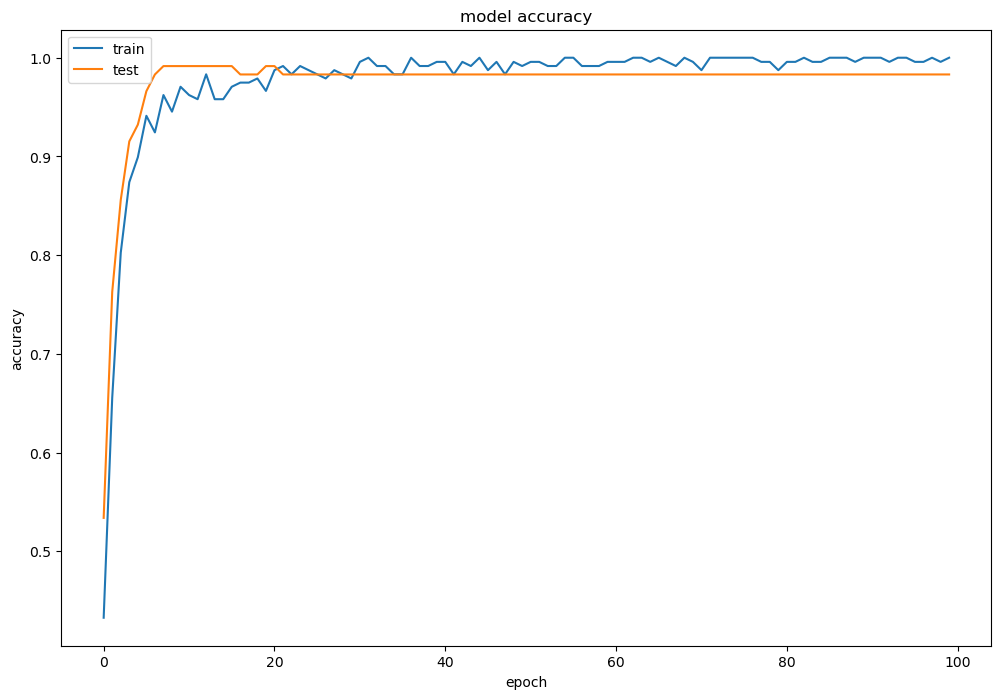

In [86]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# After 25 epoch the performance on test data is almost same

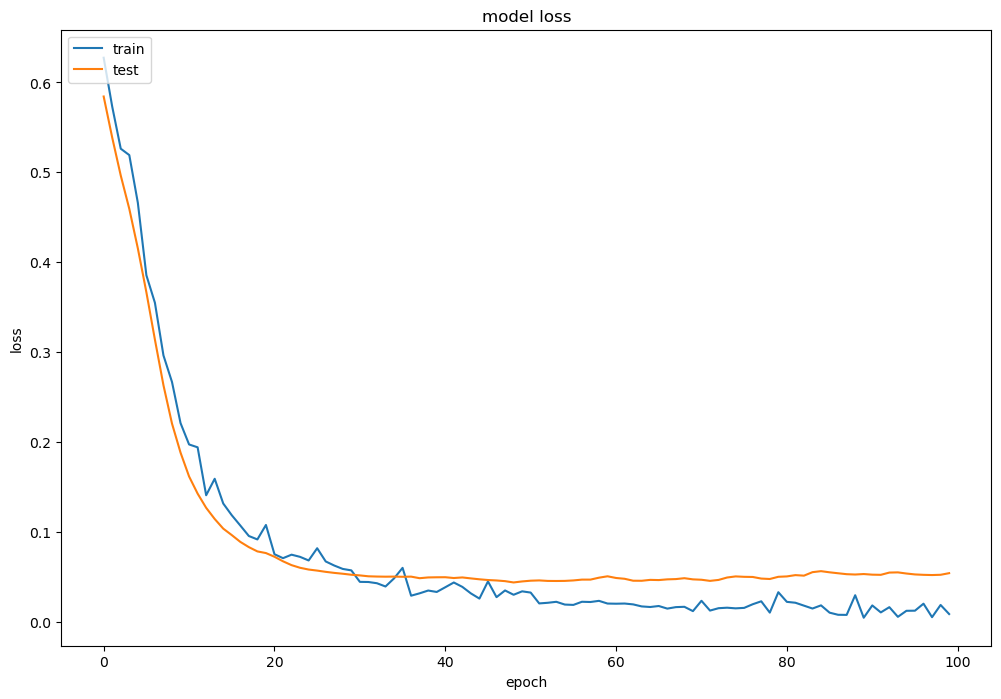

In [87]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# The model loss also reduced after 25 epoch

# The training and testing curve almost converged , means the model performance is good

# Predicting values from Model using same dataset

In [96]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 8ms/step
(153, 3)


,Test_Actual,Test_Probability,Test_Predicted
80,0,8.112252e-07,0
321,1,6.677472e-01,1
492,0,8.285428e-06,0
401,0,1.783726e-02,0
169,0,7.970713e-05,0
500,0,4.201290e-05,0
64,0,4.123637e-07,0
187,1,9.254410e-01,1
85,0,2.200792e-07,0
126,0,3.353751e-06,0


# The model is giving almost 100% accuracy on the test data set